# Felipe Castillo
# Mile Stone 1
# Data Mining
# 04/20/2022

  In this project, we will work with the database Bank Turnover Dataset. This data set can be found and downloaded here: https://www.kaggle.com/datasets/barelydedicated/bank-customer-churn-modeling. Banks rely on the consumer to keep the money in the bank. With higher turnovers, the bank’s loaning power decreases. Coming to our hypothesis, is it possible to get a good idea of potential churns, and with that minimal information, could we reduce churns? In all reality, the money the consumer puts in the bank isn’t always there. For example, if you have a million dollars in the bank and ask to withdraw that amount in cash in one day, the bank will most likely not be able to give you that sum of money. Why is that? It is because the banks loan the money and charge interest on that money. 

The problem with churn is that it can limit the bank’s overall lending power. The money must come from somewhere. For the bank to be able to make money, it needs money. This is a problem because the bank could lose money in the long run. Depending on the level of churn there are ramifications when there is less money in the bank. This will likely cause higher interest rates on loans. Even the smallest levels of churn could pose a problem. For example, if Elon Musk took his money out of the bank, it would have a larger impact than if a lot of people who had money in the bank took out their money. With that same logic, a small group of people could potentially make most of the money in the bank. With that said, it is imperative to understand churn to either stop it or be able to prepare for it. 

The first step in this graphical analysis is to figure out the percentage of churn in the bank. From that base, we need to know who those people are. For this purpose, we need to identify everyone by nationality, gender, age, and score. All this information will help answer one question: who are these people? Secondly, we need a correlation matrix to identify if there is a relation between values. For example, do gender differences matter when it comes to people leaving the bank? Is there a correlation between bank churns and the values that need to be investigated? The values that are in the data set will need to be investigated further.

There are a few predictive models that come to mind. First, we have a logistic regression model due to the binary option of 0 or 1. This will also help us test our hypothesis on if we could help prevent churn. The other model is survival analysis which also has that binary aspect. By binary I mean 1 they did leave or 0 they didn’t leave. Overall, the main objective is to predict bank churn.





In [4]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import random
from sklearn.metrics import r2_score
from math import sqrt

from sklearn.metrics import mean_squared_error
#Change path to week one folder for DSC-550
#Current directory in documents
os.chdir('C:\DataScience_DSC_550\Week6')


In [5]:
bank_turn_overDF = pd.read_csv("data_turn.csv")

In [6]:
bank_turn_overDF.head()

,Row,Id,Surname,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
bank_turn_overDF.shape

(10000, 14)

In [8]:
bank_turn_overDF.columns.values

array(['Row', 'Id', 'Surname', 'Score', 'Nationality', 'Gender', 'Age',
       'Tenure', 'Balance', 'Products', 'Card', 'Active', 'Salary',
       'Exited'], dtype=object)

In [9]:
#VGS_df.groupby('Genre')['Name'].count()
# exited 1 == churn
bank_turn_overDF.groupby('Exited')['Exited'].count()

Exited
0    7963
1    2037
Name: Exited, dtype: int64

# Pie Chart

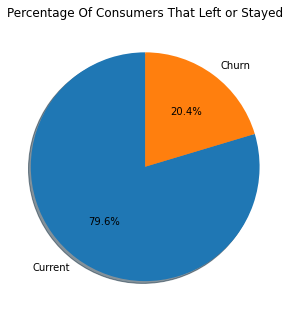

In [10]:
# 0 == current has not left the bank
# 1 == left the bank
labels = ['Current','Churn']


#setting plot figure size
fig = plt.figure(figsize=(7,4))
#setting ax to figure shape 
ax = fig.add_axes((0,0,.5,1))
#setting tiltle name
plt.title("Percentage Of Consumers That Left or Stayed")
#unpacking values in pie
#getting the exact values for exits
ax.pie( bank_turn_overDF.groupby('Exited')['Exited'].count(),labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  
plt.show()

This graph indicates that 20.4% of the people ended up leaving the bank. There was 79.6 percent of the people that have continued to stay with the bank. Overall, the attrition rate doesn’t seem to be too extreme. Essentially, we must look to see why 20% of those people are quitting. 

# Bar Graph

Each person must be classified by their individual traits. This will help us limit the scope of those people that are leaving the bank.

In [11]:
#young adults(ages 18-35 years; n = 97), 
#middle-aged adults (ages 36-55 years, n = 197), 
#and older adults (aged older than 55 years, n = 49).
#https://pubmed.ncbi.nlm.nih.gov/11815703/   

#Taking the Age value and returning the group it stands in
# the age group is taken from the government article, to define age groups

def age_classification(age):
    #initializing value to none 
    age_value = None
    #taking age and returning value 
    #using artilce to base classification age
    if(age >= 18 and age <=35):
        age_value = 'young_adults'
    elif(age>=36 and age<=55):
        age_value = 'middle_aged_adults'
    elif(age> 55):
        age_value = 'older_adult'
    else:
        age_value = None
    return age_value
    
        
        

In [12]:
#https://www.experian.com/blogs/ask-experian/credit-education/score-basics/what-is-a-good-credit-score/

#scores resembles our credit structure
#assumption is that these score are similar to our scores
def score_classificaiton(score):
    score_value = None
    #taking score and returning value 
    #using article to base classification score on us experian score
    if(score <= 579):
        score_value = 'Poor'
    elif(score>= 580 and score <=669):
        score_value = 'Fair'
    elif(score>=670 and score <= 739):
        score_value = 'Good'
    elif(score>=740 and score <=799):
        score_value = 'Very_Good'
    elif(score > 800):
        score_value = 'Exceptional'
    else:
        score_value = None
    return score_value

In [13]:
#this score is well within our fico score
#My assumption is this score is similar to credit score
#To prove this assumption, I am taking the min , median, and max

min_score = bank_turn_overDF['Score'].min()
mid_score = bank_turn_overDF['Score'].median()
max_score = bank_turn_overDF['Score'].max()

print("Lowest Score {}\nMiddle Score {}\nHighest score {} ".format(min_score,mid_score, max_score))


Lowest Score 350
Middle Score 652.0
Highest score 850 


In [14]:
#copying original data frame
bank_GeneralCustomerInfo_df = bank_turn_overDF.copy()

#Getting age group , applying age_classification function
#New column Age_Group
bank_GeneralCustomerInfo_df['Age_Group'] = bank_GeneralCustomerInfo_df['Age'].apply(age_classification)

#Getting score group , applying score_classification function
#New column Score_Group
bank_GeneralCustomerInfo_df['Score_Group'] = bank_GeneralCustomerInfo_df['Score'].apply(score_classificaiton)

In [15]:
bank_GeneralCustomerInfo_df.head(3)

,Row,Id,Surname,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary,Exited,Age_Group,Score_Group
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,middle_aged_adults,Fair
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,middle_aged_adults,Fair
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,middle_aged_adults,Poor


In [16]:
#Removing  mutiple columns, these columns dont provide useful information and have to be removed.
#only personal individual information will be displayed.
bank_GeneralCustomerInfo_df = bank_GeneralCustomerInfo_df.drop(['Row', 'Id', 'Surname',  
       'Tenure', 'Balance', 'Products', 'Card', 'Salary',
       'Exited','Age','Score','Active'], axis=1).copy()

In [17]:
bank_GeneralCustomerInfo_df.head(3)

,Nationality,Gender,Age_Group,Score_Group
0,France,Female,middle_aged_adults,Fair
1,Spain,Female,middle_aged_adults,Fair
2,France,Female,middle_aged_adults,Poor


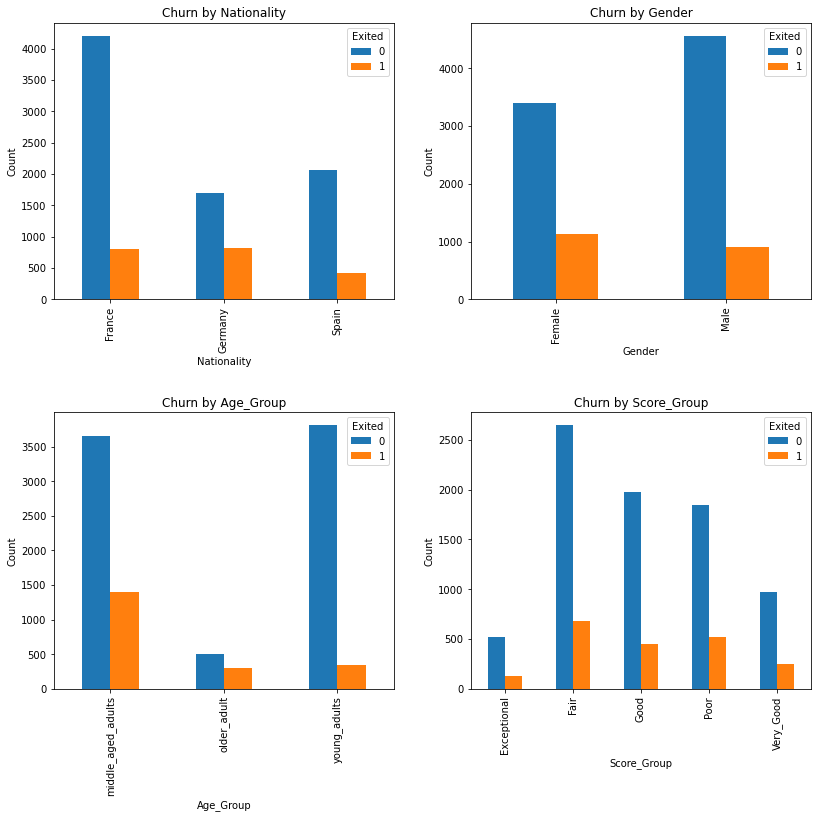

In [18]:
#Setting figure size
fig = plt.figure(figsize=(12,12))
#initializing count to 1
count = 1
#taking each column in bank_GeneralCustomerInfo_df
#Should consist of 4 
for i in bank_GeneralCustomerInfo_df.columns.values:
    #4 plots will show the subplot will be set to 2 and 2
    ax = plt.subplot(2,2,count)
    #Setting value by comparision of bank turn over('Exited')
    pd.crosstab(bank_GeneralCustomerInfo_df[i],bank_turn_overDF['Exited']).plot(kind='bar',ax=ax)
    plt.tight_layout(pad=3.0)
    
    #Setting title to instance of first columns
    plt.title("Churn by "+ i)
    plt.xlabel(i)
    plt.ylabel("Count")
    
    #counter increment for new plot
    count = count + 1

The graph could be thought of as one big graph. There does seem to be more women leaving the bank than men. It also looks like they are more men that are staying at the bank than women. As a base of nationality, Germany and France have similar exit rates versus Spain which has a lower rate. It also seems like middle-aged adults between 36 and 55 are disproportionately leaving the bank versus young adults and older adults. Fair and poor credit scores have the highest exit rates from the bank.

In [19]:
#Seeing the difference size in gender
#There are more males then females, this can explain the previous graph on why there are more men that stay in the bank.
bank_GeneralCustomerInfo_df.groupby('Gender')['Gender'].count()

Gender
Female    4543
Male      5457
Name: Gender, dtype: int64

# Correlation Coefficient Matrix

In [20]:
#Setting a martix to original values
#Removeing Row number and Id , would provided information for correlation graph
bank_t_over = bank_turn_overDF.drop(['Row', 'Id'], axis=1).copy()

corrMatrix = bank_t_over.corr()

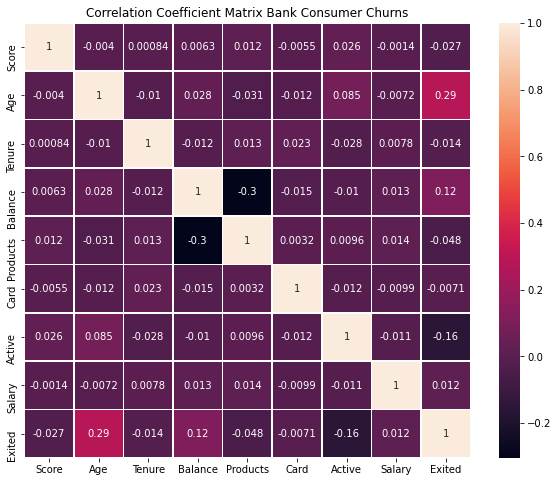

In [21]:
#All values of corrMatrix will be passed in matrix graph
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(corrMatrix, annot= True,  linewidths=.5, ax=ax)
plt.title("Correlation Coefficient Matrix Bank Consumer Churns")
plt.show()

There are three values that have a positive correlation to people that have exited. The first is age with a 29 percent positive correlation. Balance and salary both have the same correlation at 12 percent. This shows that the age and the amount of money factor into whether the person will leave or not.

# Histogram

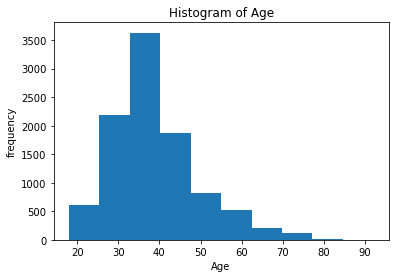

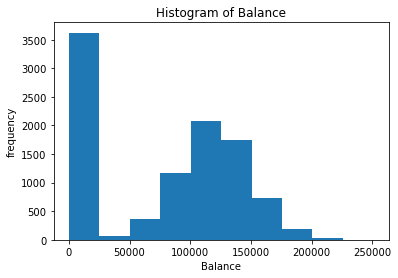

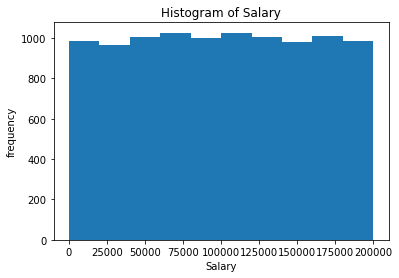

In [22]:
#heat map had values that had some correlation with exited
#this means the values should be looked into more
#Plot the graphs that have correlation with exits
#only values with any correlation will be graphed, there should be 3
for i in enumerate(bank_t_over):
    if(i[1] == 'Age' or i[1] == 'Salary' or i[1] == 'Balance'):
        plt.title("Histogram of " +i[1])
        plt.hist(bank_t_over[i[1]])
        plt.xlabel(i[1])
        plt.ylabel("frequency")
   
        plt.show()

The greatest number of people leaving are between the ages of 30 and 40 years. With most of the balances being between 0 and 50,000 dollars. It levels off around 150,000 and 200,000 dollars. Overall, these traits are the ones with a positive correlation. The salary that people make is all over the board meaning they are not normal distributions.


# Conclusion

The overall bank churn is around 20.4%. This means that 79.6% of the consumers stay with the bank. Also, there are more men at the bank than women. However, there are more women leaving the bank than men. In other words, there are fewer women at the bank, and a large number leaving the bank. Perhaps there are some gender factors that should be investigated. On an age factor, more middle-aged people are leaving the bank than other age groups. The score values indicate that those people with a fair credit score are more likely to churn. Exceptional credit scores have very few people that end up exiting. A data entry that would make this picture complete would be interest rates. Perhaps the score gives them perks. There are 3 values that have a correlation with bank churn which are age, balance, and salary. Age has the highest factor. The average age to churn is between the ages of 30 and 40. The overall average balance is between 0 and 23/30 thousand. The salaries for churn are all over the board. Overall, this begins to cover some answers to the first few questions. With that said, it arises more questions.